In [5]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image

from matplotlib.pyplot import imshow

""" image trasformation packages """
from PIL import Image
import skimage.io as skio

""" statistical data visualization packages"""
import seaborn as sns

""" machine learning functions """
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [6]:
from funcoes import *

In [7]:
captchas_files = sorted(glob('../testes/captcha_teste*.png'))
imgs = skio.imread_collection(captchas_files)

In [8]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]

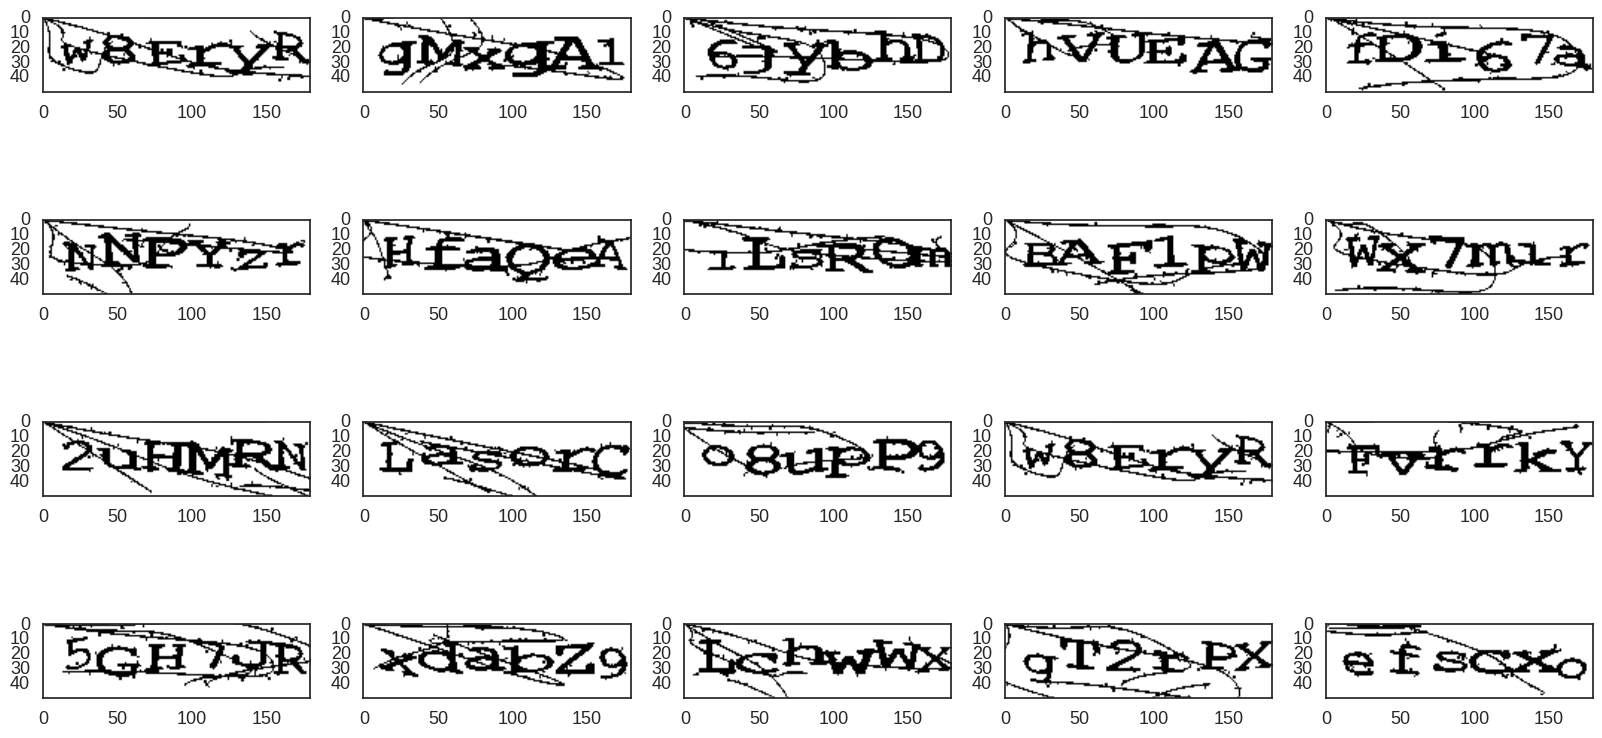

In [9]:
plot_captchas( unblobbed, (4, 5) )

In [10]:
certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
        'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
        '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
        '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']

# Tentativa com Tesseract

In [7]:
#%%time
#%%capture
#respostasTS = []
#for i, captcha in enumerate(unblobbed):
#    resposta = tsrct_captcha(captcha)
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasTS.append(resposta)

In [8]:
#print(respostasTS)

In [9]:
#tesseract = []

#for i, captcha in enumerate(certo):

    #tesseract.append(0)    
    #for j, letra in enumerate(captcha):
        #if (letra == respostasTS[i][j]):
        #    tesseract[i] += 1

In [10]:
#print(tesseract)

In [11]:
#print("pontos totais: " + str(sum(tesseract)/(20*6)))

# Tentativa com modelo ML

## Balanced

In [12]:
%%time
%%capture
respostasML1 = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha, tipo = "balanced")
    #print("resposta "+ str(i) + ": " + resposta)
    respostasML1.append(resposta)

CPU times: user 1h 24min 6s, sys: 15.3 s, total: 1h 24min 21s
Wall time: 1h 24min 28s


In [13]:
print(respostasML1)

['zssuyE', 'uMxgA1', 'pjynBc', 'svcsAr', '13vn7a', 'kBpys3', 'HfeQuA', 'aLsHcn', 'BaF1pH', 'kk7mi1', 'puHMRH', '5ssnrF', 'vHnnFu', 'zssuyE', 'Fvnsxn', 'nQH77H', 'xuabEu', 'Lzuwzd', 'nT9zp3', 'e1anxn']


In [14]:
ML1 = []

for i, captcha in enumerate(certo):
    
    ML1.append(0)
    for j, letra in enumerate(captcha):  
        if (letra.lower() == respostasML1[i][j].lower()):
            ML1[i] += 1

In [15]:
print(ML1)

[1, 5, 2, 2, 2, 2, 4, 2, 5, 2, 4, 2, 0, 1, 2, 2, 3, 2, 2, 2]


In [16]:
print("pontos totais: " + str(sum(ML1)/(20*6)))

pontos totais: 0.39166666666666666


## Unbalanced

In [17]:
%%time
%%capture
#respostasML2 = []
#for i, captcha in enumerate(unblobbed):
#    resposta = modela_captcha(captcha, tipo = "RF")
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasML2.append(resposta)

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 744 ms


In [18]:
#print(respostasML2)

In [19]:
#ML2 = []
#for i, captcha in enumerate(certo):

    #ML2.append(0)
    #for j, letra in enumerate(captcha):
        #if (letra == respostasML2[i][j]):
        #    ML2[i] += 1

In [20]:
#print(ML2)

In [21]:
#print("pontos totais: " + str(sum(ML2)/(20*6)))

# Tentativa com funções super_score

In [22]:
%%time
%%capture
respostasSS = []
v = 1 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS.append(resposta)

CPU times: user 1h 21min 24s, sys: 11.7 s, total: 1h 21min 36s
Wall time: 1h 21min 39s


In [23]:
print(respostasSS)

['x8szvB', 'uMkgA1', 'p1ybBc', 'hvouAc', 'tJ1w7a', 'rNFTvt', 'HfaQeA', 'gLzEow', 'HAF1pM', 'kk7m11', '7uoMBn', '5sss1t', 'bEupp9', 'x8szvB', 'xvtrk1', '3cH7Jz', 'xdabcu', 'LzowkA', 'gT3H1z', 'a1ccxs']


In [24]:
super_score = []
for i, captcha in enumerate(certo):

    super_score.append(0)
    for j, letra in enumerate(captcha):
        if (letra.lower() == respostasSS[i][j].lower()):
            super_score[i] += 1

In [25]:
print(super_score)

[1, 4, 2, 3, 2, 1, 6, 2, 4, 3, 3, 1, 4, 1, 3, 3, 4, 2, 2, 2]


In [26]:
print("pontos totais: " + str(sum(super_score)/(20*6)))

pontos totais: 0.44166666666666665


# Tentativa com funções super_score2

In [27]:
%%time
%%capture
respostasSS2 = []
v = 2 # super score possui 3 versões até o momento (3 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS2.append(resposta)

CPU times: user 1h 21min 41s, sys: 12.4 s, total: 1h 21min 53s
Wall time: 1h 22min 3s


In [28]:
print(respostasSS2)

['tkHzyA', 'uMxgA1', 'Ajybh3', 'HvpuAB', '731E7a', 'rNFyzt', 'EteQrA', 'jLaEwv', 'sAF1na', 'kk7mri', '7nHMBn', '5BsnrF', 'sNunFu', 'tkHzyA', 'Fatrkc', 'bAH7JA', 'auab5s', 'hz3whN', 'jl21pz', 'wTunra']


In [29]:
super_score2 = []

for i, captcha in enumerate(certo):

    super_score2.append(0)
    for j, letra in enumerate(captcha):
        if (letra.lower() == respostasSS2[i][j].lower()):
            super_score2[i] += 1

In [30]:
print(super_score2)

[1, 5, 4, 3, 2, 3, 2, 1, 3, 2, 3, 2, 1, 1, 3, 3, 2, 1, 2, 0]


In [31]:
print("pontos totais: " + str(sum(super_score2)/(20*6)))

pontos totais: 0.36666666666666664


# Tentativa com funções super_score3

In [32]:
%%time
%%capture
respostasSS3 = []
v = 3
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS3.append(resposta)

CPU times: user 1h 21min 40s, sys: 12.8 s, total: 1h 21min 52s
Wall time: 1h 22min 50s


In [33]:
print(respostasSS3)

['THGhjB', 'h3jRBh', 'j3hDHH', 'u1hhhj', 'jBujjN', 'HHH2jR', 'HGmRHu', 'HRhENh', 'HHjhhj', 'uhqhH2', 'hRN1Nj', '51juHj', 'hTHNj2', 'THGhjB', 'pjhh3R', 'HT13Hj', 'huhH5j', 'TmjQh6', 'hjhNRN', 'TDhhGh']


In [34]:
super_score3 = []

for i, captcha in enumerate(certo):

    super_score3.append(0)
    for j, letra in enumerate(captcha):
        if (letra.lower() == respostasSS3[i][j].lower()):
            super_score3[i] += 1

In [35]:
print(super_score3)

[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
print("pontos totais: " + str(sum(super_score3)/(20*6)))

pontos totais: 0.025


# Tentativa com funções super_score4

In [37]:
%%time
%%capture
respostasSS4 = []
v = 4
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS4.append(resposta)

CPU times: user 1h 21min 48s, sys: 13.8 s, total: 1h 22min 2s
Wall time: 1h 22min 15s


In [38]:
print(respostasSS4)

['w8LryL', 'yMxqA1', 'pjybpL', 'hvuLLL', 'u3L67L', 'LNFrrL', 'LraQsL', 'jLsMBw', 'BAF1pL', 'Ek7mLL', '76HMBL', 'Lvsar6', 'b6u9F9', 'w8LryL', 'pyrLk9', '8oH7xL', 'HdabLL', 'Lru4ML', 'jL2rLL', '41suxa']


In [39]:
super_score4 = []

for i, captcha in enumerate(certo):

    super_score4.append(0)
    for j, letra in enumerate(captcha):
        if (letra.lower() == respostasSS4[i][j].lower()):
            super_score4[i] += 1

In [40]:
print(super_score4)

[4, 4, 3, 3, 2, 1, 2, 2, 5, 2, 2, 3, 2, 4, 2, 2, 3, 1, 2, 2]


In [41]:
print("pontos totais: " + str(sum(super_score4)/(20*6)))

pontos totais: 0.425


# Tentativa com funções super_score5

In [11]:
%%time
%%capture
respostasSS5 = []
v = 5 # super score possui 5 versões até o momento (5 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS5.append(resposta)

CPU times: user 2h 21min 6s, sys: 1min 46s, total: 2h 22min 53s
Wall time: 2h 23min 27s


In [12]:
print(respostasSS5)

['H8EryH', 'gMkqA2', 'HjybhD', 'hvuHAM', '1JL67h', 'HNFr5r', 'HfeQe4', 'yLzEoo', 'HAF1pH', 'kk7m2r', 'HuHsBh', 'HHsort', 'qHuppu', 'H8EryH', 'yotyk1', '8zH7Jh', 'Hd8b5s', 'LsuwBh', 'jT7Hpz', 'e1auks']


In [15]:
super_score5 = []

for i, captcha in enumerate(certo):

    super_score5.append(0)
    for j, letra in enumerate(captcha):
        if (letra.lower() == respostasSS5[i][j].lower()):
            super_score5[i] += 1

In [17]:
print(super_score5)

[4, 3, 5, 4, 2, 2, 4, 2, 4, 3, 2, 3, 3, 4, 1, 3, 2, 2, 2, 1]


In [18]:
print("pontos totais: " + str(sum(super_score5)/(20*6)))

pontos totais: 0.4666666666666667


# Avaliação

# Conclusão

Técnica *super_score* obteve melhores resultados na previsão.